In [31]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table 
from plottable.cmap import normed_cmap
from plottable.plots import image


In [6]:
df = pd.read_html("https://fbref.com/en/comps/9/Premier-League-Stats", attrs={"id":"results2023-202491_overall"})[0]

In [7]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Liverpool,19,12,6,1,39,16,23,42,2.21,37.2,22.0,15.1,0.80,W W D D W,52079,Mohamed Salah - 12,Alisson,NaN
1,2,Aston Villa,20,13,3,4,43,27,16,42,2.10,35.9,25.4,10.5,0.52,W W D L W,28969,Ollie Watkins - 9,Emiliano Martínez,NaN
2,3,Manchester City,19,12,4,3,45,21,24,40,2.11,36.8,17.9,19.0,1.00,L W D W W,47396,Erling Haaland - 14,Ederson,NaN
3,4,Arsenal,19,12,4,3,36,18,18,40,2.11,34.7,15.1,19.6,1.03,W L W D L,60169,"Eddie Nketiah, Bukayo Saka - 5",David Raya,NaN
4,5,Tottenham,19,11,3,5,39,28,11,36,1.89,32.9,33.1,-0.2,-0.01,L W W W L,61606,Son Heung-min - 11,Guglielmo Vicario,NaN


In [20]:
df["Badge"] = df["Squad"].apply(lambda x: f"C:/Users/edfp1/Downloads/Proyectos/Python plottable/Logos/{x.lower()}_logo.png")

In [21]:
df["Badge"][0]

'C:/Users/edfp1/Downloads/Proyectos/Python plottable/Logos/liverpool_logo.png'

In [22]:
df.columns

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes', 'Badge'],
      dtype='object')

In [79]:
df = df[[
    'Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 
    
]]

In [24]:
df.columns

Index(['Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'],
      dtype='object')

In [90]:
bg_color = "#F8FFF9"
text_color = "000000"
row_color = {
    "top4": "#96DE6F",
    "top6": "#E5F77D",
    "bottom3": "#E25261", 
    "even": "",
    "odd": ""
    
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "Helvetica"


In [30]:
df.columns

Index(['Rk', 'Badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts',
       'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'],
      dtype='object')

In [100]:
col_defs = [
        ColumnDefinition(
            name="Rk",
            title="Rank",
            textprops={"ha": "center"},
            width=0.5
        ),
        ColumnDefinition (
            name="Badge",
            textprops={"ha": "center",  "va": "center", "color": bg_color},
            width=0.5,
            plot_fn = image
        ),
        ColumnDefinition(
            name="Squad",
            textprops={"ha": "left", "weight":"bold"},
            width=1.75,
        ),
        ColumnDefinition(
            name="MP",
            group= "Matches",
            title="MP",
            textprops={"ha": "center"},
            width=0.5
        ),
        ColumnDefinition(
            name="W",
            group= "Matches",
            title="W",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="D",
            group= "Matches",
            title="D",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="L",
            group= "Matches",
            title="L",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="GF",
            group= "goals",
            title="GF",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="GA",
            group= "goals",
            title="GA",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="GD",
            group= "goals",
            title="",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="Pts",
            group= "points",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="Pts/MP",
            group= "points",
            textprops={"ha": "center"},
            width=0.5,
        ),
        ColumnDefinition(
            name="xG",
            group= "xG",
            textprops={"ha": "center", "color": text_color, "weight": "bold", "bbox": {"boxstyle":"circle"}},
            cmap = normed_cmap(df['xG'], cmap=matplotlib.cm.PiYG, num_stds=2),
            width=0.5,
        ),
        ColumnDefinition(
            name="xGA",
            group= "xG",
            textprops={"ha": "center", "color": text_color, "weight": "bold", "bbox": {"boxstyle":"circle"}},
            cmap = normed_cmap(df['xGA'], cmap=matplotlib.cm.PiYG_r, num_stds=2),
            width=0.5,
        ),
        ColumnDefinition(
            name="xGD",
            group= "xG",
            textprops={"ha": "center", "color": text_color, "weight": "bold", "bbox": {"boxstyle":"circle"}},
            cmap = normed_cmap(df['xGD'], cmap=matplotlib.cm.PiYG, num_stds=2.5),
            width=0.5,
        ),
    ]

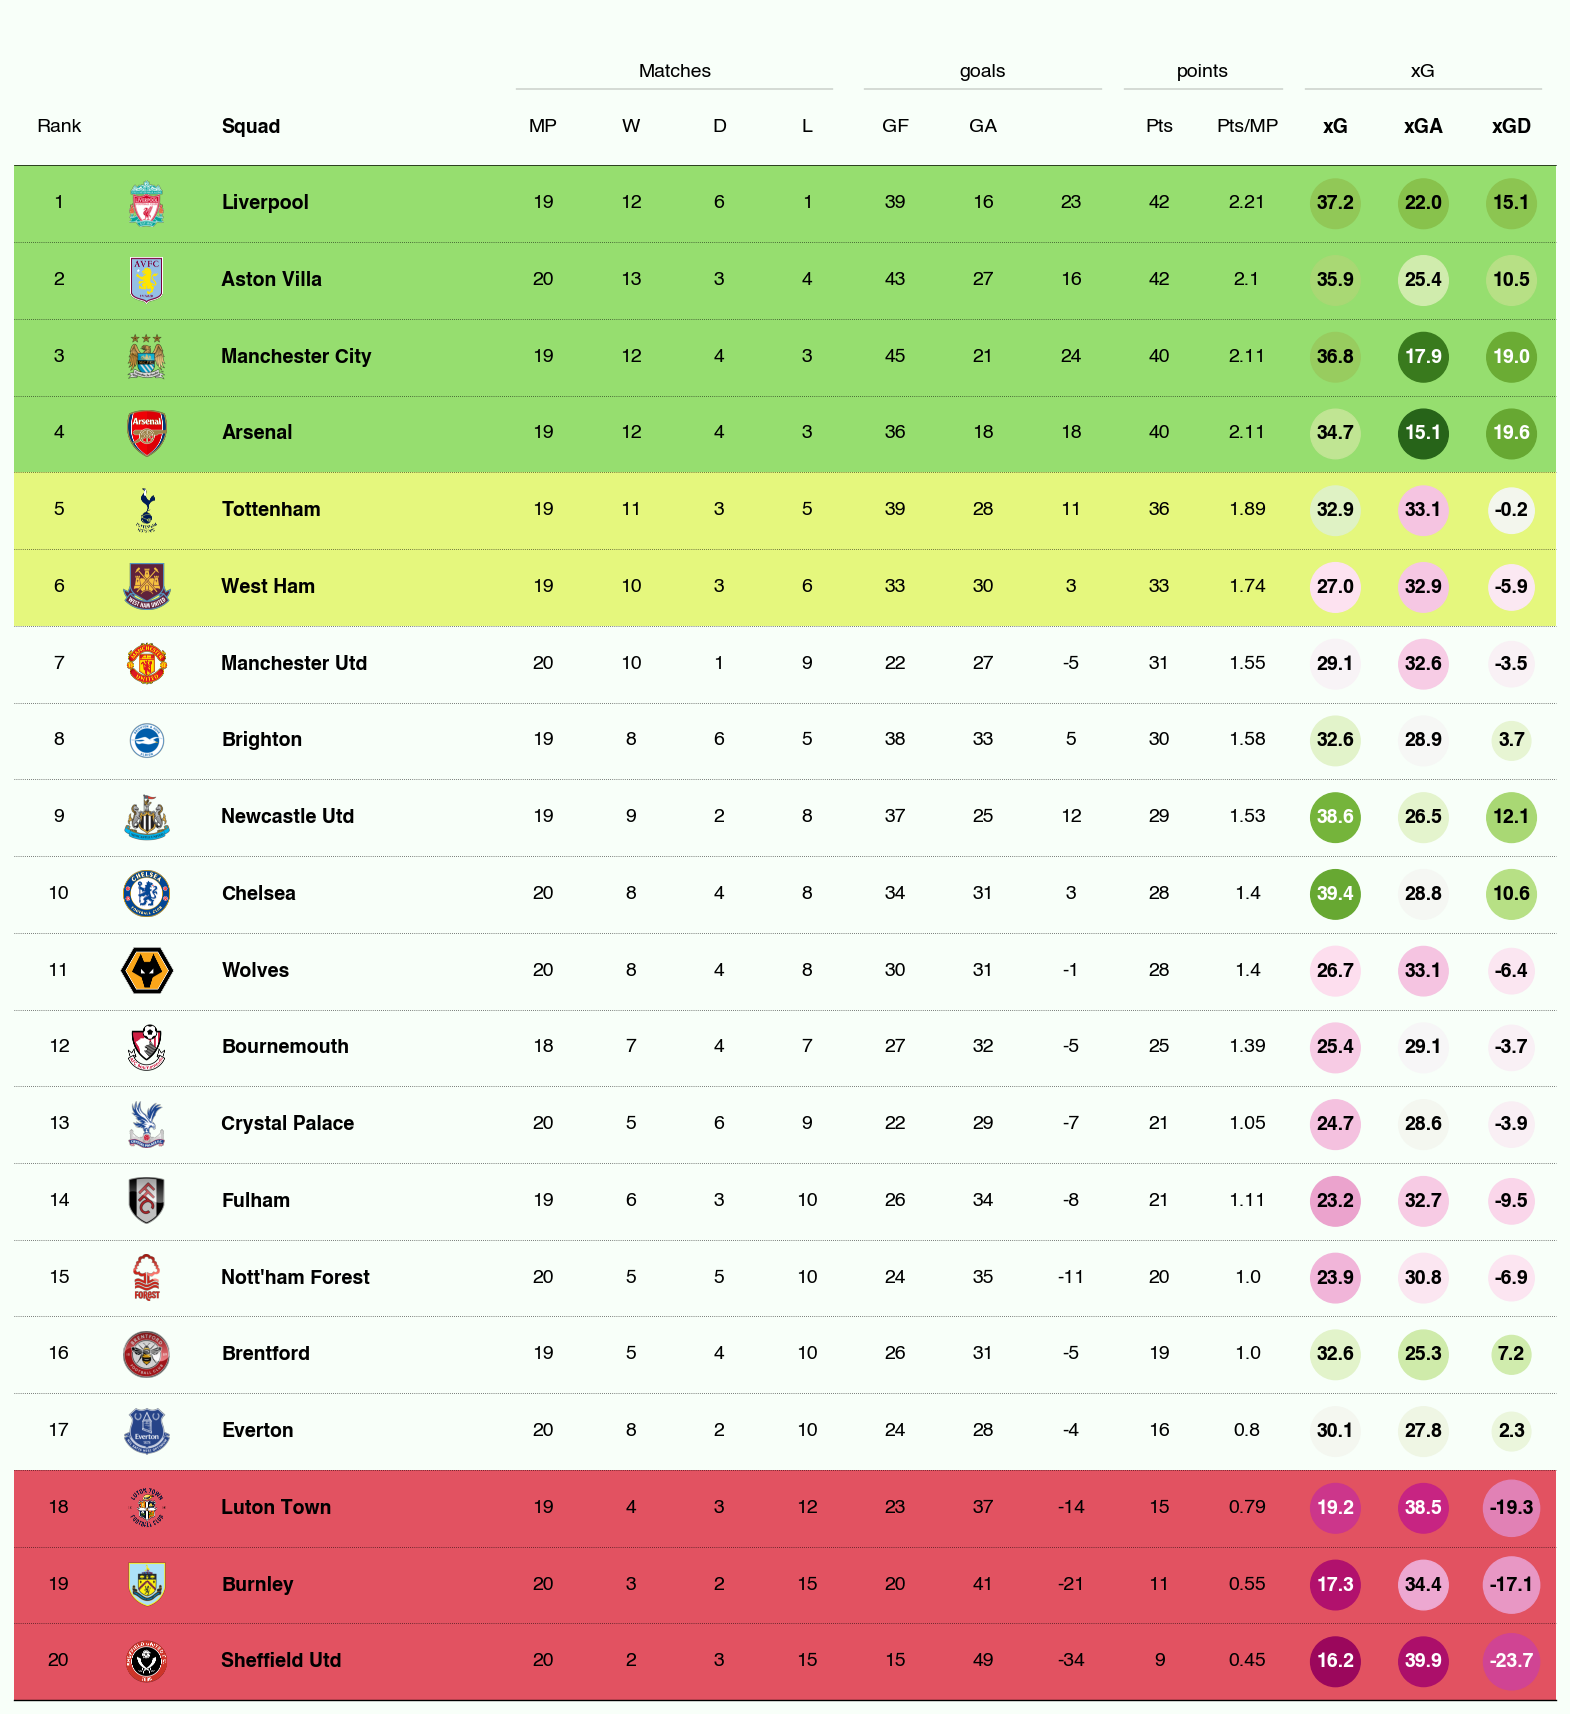

In [102]:
fig, ax = plt.subplots(figsize=(20,22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df, 
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 0.5, "linestyle": (0, (1,2))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 0.5, "linestyle": "-"},
    column_border_kw={"linewith": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"])

for idx in [0, 1, 2, 3]:
    table.rows[idx].set_facecolor(row_color["top4"])
for idx in [4, 5]:
    table.rows[idx].set_facecolor(row_color["top6"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_color["bottom3"])
    
fig.savefig("Ever.png", dpi=200, bbox_inches="tight")